In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('kaggle.csv')

print("The shape of the dataset is: ", df.shape)
print("The columns of the dataset are: ", df.columns.values)

The shape of the dataset is:  (14765, 7)
The columns of the dataset are:  ['artist' 'songs' 'song' 'artist_key' 'url' 'words count'
 'unique words count']


In [3]:
df.head()

,artist,songs,song,artist_key,url,words count,unique words count
0,אדם,"['אחרי', 'שאמות', 'יבואו', 'פתאום', 'אנשים', '...",אחרי שאמות,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,103,79
1,אדם,"['אתה', 'תראה', 'עוד', 'יגיעו', 'ימים', 'טובים...",אין יותר שדים,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,117,85
2,אדם,"['משוטט', 'ברחוב', 'במתח', 'תר', 'בכל', 'חלון'...",אין מוצא,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,67,47
3,אדם,"['איש', 'עוד', 'לא', 'הכיר', 'אותי', 'כמו', 'ש...",איש עוד לא הכיר אותי,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,134,48
4,אדם,"['אנשים', 'טועים', 'בחושך', 'גשם', 'ניתך', 'הם...",אל תשכח,Artist_Adam,http://shironet.mako.co.il/artist?type=lyrics&...,135,61


In [4]:
df.describe()

,words count,unique words count
count,14765.000000,14765.000000
mean,112.443210,70.598171
std,61.125532,36.340199
min,0.000000,0.000000
25%,78.000000,50.000000
50%,101.000000,65.000000
75%,134.000000,83.000000
max,771.000000,456.000000


In [5]:
# Clean empty songs (songs with non-hebrew lyrics)
cleaned_df = df[df['songs'] != '[]']
print(f"Total number of songs: {len(cleaned_df)}")

Total number of songs: 14543


In [6]:
# Get the number of artists
artists = cleaned_df['artist'].unique()
print(f"Total number of artists: {len(artists)}")

Total number of artists: 166


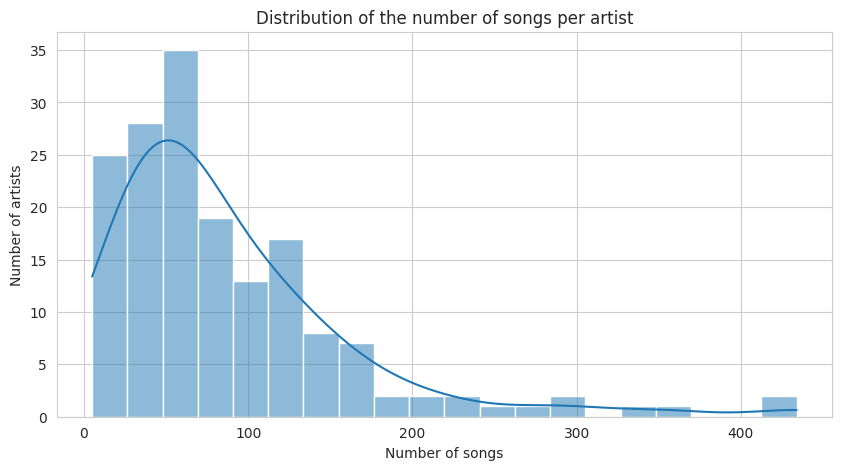

In [7]:
# Plot the distribution of the number of songs per artist

# Get the number of songs per artist
songs_per_artist = cleaned_df.groupby('artist').count()['songs']
# Plot the distribution
plt.figure(figsize=(10, 5))
plt.title('Distribution of the number of songs per artist')
plt.xlabel('Number of songs')
plt.ylabel('Number of artists')
sns.histplot(songs_per_artist, bins=20, kde=True);

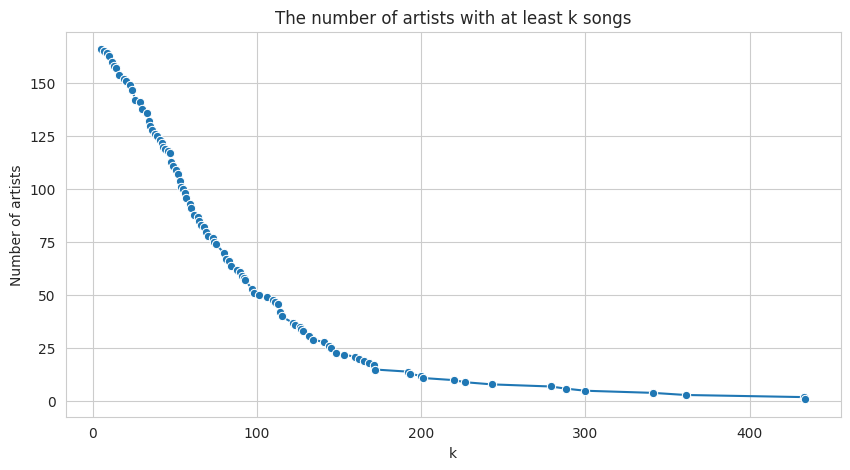

In [8]:
# Plot the number of artists with at least k songs
artists_per_songs = songs_per_artist.value_counts().sort_index(ascending=False)

artists_per_threshold = artists_per_songs.cumsum()

plt.figure(figsize=(10, 5))
plt.title('The number of artists with at least k songs')
plt.xlabel('k')
plt.ylabel('Number of artists')
sns.lineplot(data=artists_per_threshold, marker='o');

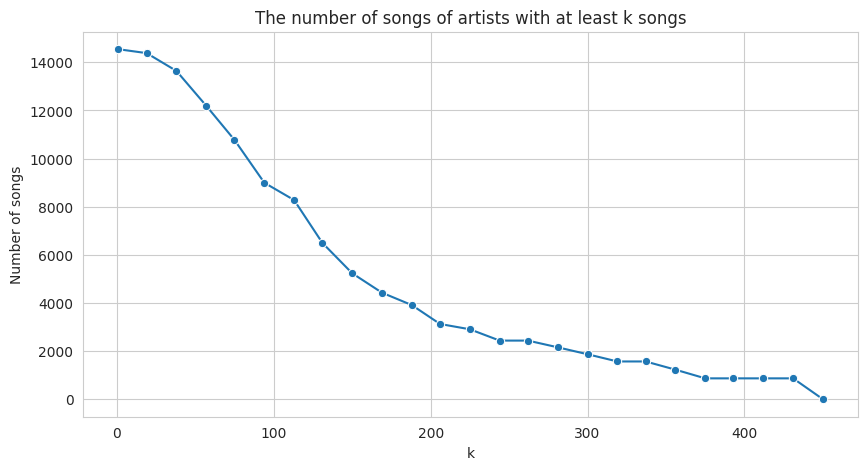

In [9]:
threshold = np.linspace(1, 450, 25, dtype=int)
songs_per_threshold = [(songs_per_artist[songs_per_artist >= threshold]).sum() for threshold in threshold]

plt.figure(figsize=(10, 5))
plt.title('The number of songs of artists with at least k songs')
plt.xlabel('k')
plt.ylabel('Number of songs')
sns.lineplot(x=threshold, y=songs_per_threshold, marker='o');

In [75]:
# Duplicate songs
cleaned_df['songs'].value_counts().value_counts()

1     11190
2      1077
3       198
4        58
5        32
6        18
7         5
22        1
18        1
13        1
9         1
8         1
Name: songs, dtype: int64

In [82]:
cleaned_df.query('songs.str.contains("בשנה")')

,artist,songs,song,artist_key,url,words count,unique words count
182,אהובה עוזרי,"['צועני', 'יפיפה', 'בדרכו', 'מזמר', 'את', 'שיר...",צועני נודד,Artist_Ahuva_uzeri,http://shironet.mako.co.il/artist?type=lyrics&...,77,63
1219,ארקדי דוכין,"['גבר', 'חי', 'עם', 'אישה', 'במשך', 'חודשים', ...",הרי את מותרת,Artist_Arkadi_Duchin,http://shironet.mako.co.il/artist?type=lyrics&...,250,167
1413,אביב גפן,"['גשם', 'כיסה', 'את', 'אספלט', 'הכביש', 'ביום'...",אתה פה חסר לי,Artist_Aviv_Geffen,http://shironet.mako.co.il/artist?type=lyrics&...,122,93
2351,להקת חיל הים,"['באלה', 'הידיים', 'עוד', 'לא', 'בניתי', 'כפר'...",עוד לא אהבתי די,Artist_Cheil_HaYam,http://shironet.mako.co.il/artist?type=lyrics&...,148,79
3362,אהוד בנאי,"['האביב', 'בפתח', 'שוב', 'חשים', 'בריח', 'לא',...",האביב בפתח,Artist_Ehud_banai,http://shironet.mako.co.il/artist?type=lyrics&...,56,52
3393,אהוד בנאי,"['שימו', 'לב', 'על', 'הנשמה', 'לשם', 'שבו', 'א...",כוכבי בוקר,Artist_Ehud_banai,http://shironet.mako.co.il/artist?type=lyrics&...,53,41
3904,אביתר בנאי,"['שימו', 'לב', 'על', 'הנשמה', 'לשם', 'שבו', 'א...",כוכבי בוקר,Artist_Evyatar_Banai,http://shironet.mako.co.il/artist?type=lyrics&...,53,41
4058,אייל גולן,"['יש', 'לה', 'אחלה', 'עם', 'בריכה', 'יש', 'לה'...",וי כחול,Artist_Eyal_Golan,http://shironet.mako.co.il/artist?type=lyrics&...,123,74
5326,חוה אלברשטיין,"['גבר', 'חי', 'עם', 'אישה', 'במשך', 'חודשים', ...",הרי את מותרת,Artist_Hava_Alberstien,http://shironet.mako.co.il/artist?type=lyrics&...,251,166
5448,חוה אלברשטיין,"['מכורה', 'שלי', 'ארץ', 'נוי', 'אביונה', 'למלכ...",משירי ארץ אהבתי,Artist_Hava_Alberstien,http://shironet.mako.co.il/artist?type=lyrics&...,139,87
